In [1]:
import string
import numpy as np
import pandas as pd

In [184]:
df = pd.read_csv('Data/mail_data.csv')

In [58]:
df.sample(5)

,Category,Message
2982,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...
3624,ham,"Damn, poor zac doesn't stand a chance"
2779,spam,For ur chance to win a £250 cash every wk TXT:...
2821,spam,INTERFLORA - It's not too late to order Inter...
1429,ham,"Tell you what, if you make a little spreadshee..."


In [59]:
df.shape

(5572, 2)

### All the steps for the project:
1. Data Cleaning
2. EDA
3. Text Pre-Processing (Tfidfvectorizer)
4. Model Building
5. Evolution
6. Improvement of model
7. Frontend

## Data Cleaning

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Since unnamed2,3,4 are of no use, we'll remove them

In [61]:
df.rename(columns={'Category':'targets'}, inplace=True)

In [62]:
df.head(5)

,targets,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We'll rename the column title.

In [63]:
df.rename(columns={'Message': 'message'}, inplace=True)

In [64]:
df.head(5)

,targets,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Since we've textual data in the dataset, but we require Numerical data for the model to work on. Thus we'll convert this data into numerical data using `LabelEncoder`

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [66]:
df['targets'] = encoder.fit_transform(df['targets'])

In [67]:
df.head()

,targets,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


LabelEncoder has encoded it to 0 and 1, all the ham mail i.e. **Not Spam_Mail = 0 and Spam_Mail = 1**

In [68]:
# finding the missing values in the dataset
df.isnull().sum()

targets    0
message    0
dtype: int64

There are no null values in the dataset, thus we need not to delete any of it

In [69]:
#checking for the duplicate values
df.duplicated().sum()

415

In [70]:
df = df.drop_duplicates(keep = 'first')

In [71]:
df.duplicated().sum()

0

In [72]:
df.shape

(5157, 2)

## Exploratory Data Analysis (EDA)

In [73]:
df.head()

,targets,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
df['targets'].value_counts()

targets
0    4516
1     641
Name: count, dtype: int64

In [75]:
import matplotlib.pyplot as plt

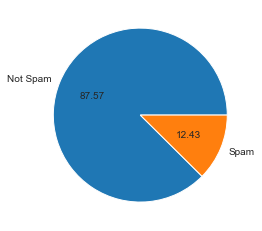

In [76]:
plt.pie(df['targets'].value_counts(), labels=['Not Spam', 'Spam'], autopct='%0.2f')
plt.show()

data is imbalance as the Not Spam data is too much and the Spam data is not so much for the prediction.

In [77]:
import nltk

We'll make new columns for the analysis,
1. Number of Character in the Mail
2. Number of Words in Mail
3. Number of Sentences in Mail
we'll do this using `nltk` **Natural Language ToolKit**

In [78]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msi1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
# Calculating the number of characters
df['num_chars'] = df['message'].apply(len) #this will give the lenghtof all the charaters of the message

In [80]:
df.head()

,targets,message,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
# finding out the number of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))
# whenever we find any text, we'll break them on the basis of words

In [82]:
df.head()

,targets,message,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [83]:
# calculating the number of sentences
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [84]:

df.head()

,targets,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [85]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,19.225325,1.965290
std,58.382922,13.987514,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,28.000000,2.000000
max,910.000000,210.000000,38.000000


We can find that:
1. There is one character that have 910 characters
2. In terms of words, 210 words are used in one of the mail.
3. In terms of sentences, there is a mail that have used around 38
4. Mean values we can check that, on what average the words, sentences and characters are used.

In [86]:
# for Not Spam messages
df[df['targets'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.568423,1.822852
std,56.708301,13.870544,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,23.000000,2.000000
max,910.000000,210.000000,38.000000


In [87]:
# for Spam Messages
df[df['targets'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,30.898596,2.968799
std,30.399707,7.943198,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,28.000000,2.000000
50%,148.000000,32.000000,3.000000
75%,157.000000,36.000000,4.000000
max,223.000000,49.000000,9.000000


We can see that the,
1. mean value for not spam messages is 70 char per messages, and for the spam one one 137 messages.
2. number of words per message in not spam messages is 17 words whereas in the Spam messages there are 30 words per Mail.
3. Number of sentences in a Not Spam mail is 1 where as for Spam mail it is 2.


We can see that the Spam Mails are much bigger than the Not Spam mails.

In [88]:
# we'll be plotting the Histogram for the same data
import seaborn as sns

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

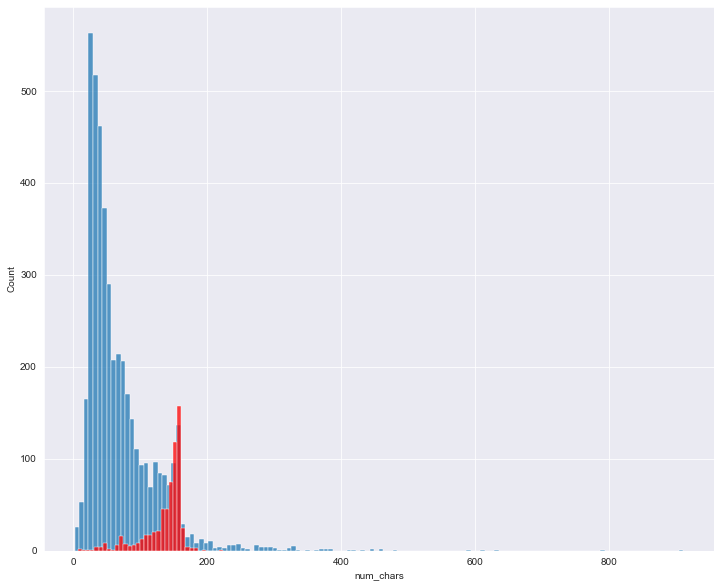

In [89]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['targets'] == 0]['num_chars']) # spam messages
sns.histplot(df[df['targets'] == 1]['num_chars'], color='red') # not spam mails

<AxesSubplot:xlabel='num_words', ylabel='Count'>

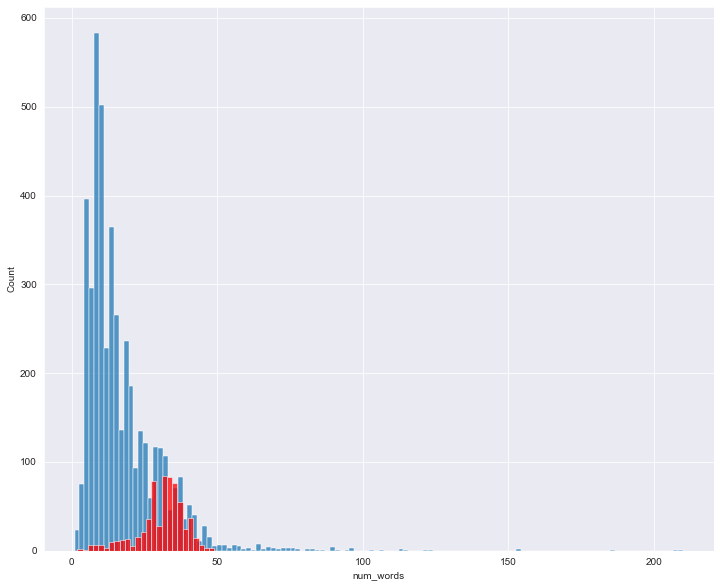

In [90]:
# for number of words
plt.figure(figsize=(12,10))
sns.histplot(df[df['targets'] == 0]['num_words']) # spam messages
sns.histplot(df[df['targets'] == 1]['num_words'], color='red') # not spam mails

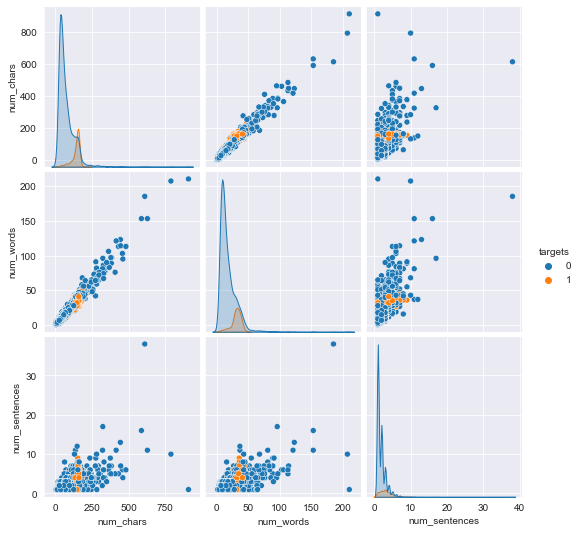

In [91]:
# checking the relationship btw the, number of sentences & number of words
sns.pairplot(df, hue='targets')
# 0 == Not Spam Mail
# 1 == Spam Mail

We can see that the data is linear and there are outliers presents in the data.

In [92]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

We can see that the target have a relation of 0.38 on num_chars, i.e as the num_char increases the tendency of being a spam mail.
For num_words it is 0.32 and for num_sentences is 0.32.
For num_sentences and num_chars its 0.63 it is high correlation and there is multi-colinearality is present.
For num_char with hum_words it is 0.66 which is again high.
And so on...

Thus we'll take `num_chars`, as the variation with targets is 0.38

### Data Preprocessing
-> convert the data in lowercase
-> tokenize the data
-> remove the special characters
-> remove the stop words and punctuations
-> we'll convert the same typ of word in single word

For this we'll create a single fucntio that will do all of these fucntions

In [93]:
def transform_tex(text):
    text = text.lower() # step 1
    text = nltk.word_tokenize(text) #step 2, text is converted into a list
    # we'll run a loop that will
    y = []
    for i in text: # step 3 - removing special chareaters
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not  in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text: # stemp 4 -> stemming
        y.append(ps.stem(i))

    return " ".join(y)

In [94]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msi1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
#transform_tex('I am dancing in the HALLWAY, and will be goin to dinner afterwards!')
# since 'how are you', all these are stopwords so nothing will be printed.

In [96]:
# step-4 Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

this function i.e. **PorterStemmer** bring the words into there root forms.
like Dancing, Danced, Dance -> dance(root form)

In [97]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [98]:
transform_tex('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [99]:
transform_tex(df['message'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [100]:
df['transformed_text'] = df['message'].apply(transform_tex)

In [101]:
df.head()

,targets,message,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


### we'll print the Word cloud to check which word is used most in Not Spam Mail and Spam Mail.

The most used word will be bigger and vice versa

In [103]:
#pip install --upgrade Pillow

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\msi1\\anaconda3\\Lib\\site-packages\\~il\\_imaging.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/5e/ae/0d98e3707678c96d86aec0fe5002637801892f17281cc123521ab929e8fd/Pillow-10.0.0-cp38-cp38-win_amd64.whl.metadata
Using cached Pillow-10.0.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0


In [104]:
#pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


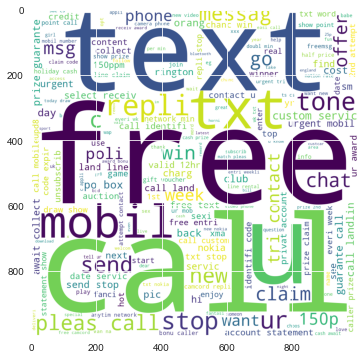

In [105]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['targets'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

The large and the most highlighted words are the most used words in a Spam Mail.

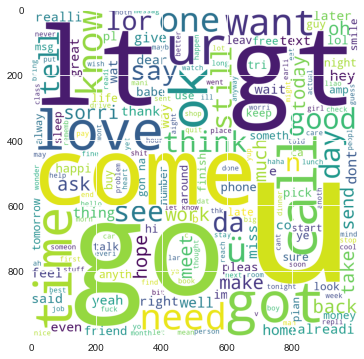

In [106]:
# WordCloud for Not Spam mails
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')
not_spam = wc.generate(df[df['targets'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(not_spam)

We'll find out the top 30 words in both of the category.

In [107]:
df[df['targets'] == 1]['transformed_text'].tolist()
# this will give us the list of all the `transformed_text' and every message in this is an item.

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

We'll run a loop on this and print all the mails/messages that are spam.

In [108]:
for msg in df[df['targets'] == 1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

No we want to split the words in this list

In [109]:
spam_corpus = []
for msg in df[df['targets'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [110]:
len(spam_corpus)

9781

This is the total number of words used in Spam Mails !

In [111]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 186,
         'entri': 21,
         '2': 154,
         'wkli': 9,
         'comp': 8,
         'win': 46,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 30,
         'question': 9,
         'std': 6,
         'txt': 139,
         'rate': 26,
         'c': 43,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 48,
         'word': 21,
         'back': 19,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 7,
         'network': 26,
         'custom': 39,
         'select': 26,
         'receivea': 1,
         'prize': 78,
         'reward': 7,
         'claim': 96,
         'cal

This will create a dictionary which will have all the words in curpus with the times it occured.

In [112]:
# to get the most common 30 words.
Counter(spam_corpus).most_common(30)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

These are the most common 30 words.

In [113]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


C:\Users\msi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


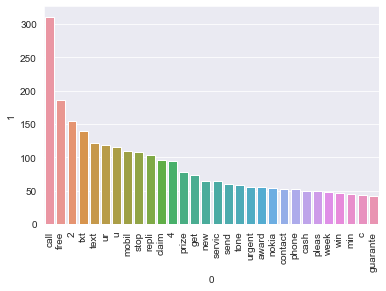

In [114]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [115]:
df[df['targets'] == 0]['transformed_text'].tolist()
for msg in df[df['targets'] == 0]['transformed_text'].tolist():
    print(msg)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
u dun say earli hor u c alreadi say
nah think goe usf live around though
even brother like speak treat like aid patent
per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun
gon na home soon want talk stuff anymor tonight k cri enough today
search right word thank breather promis wont take help grant fulfil promis wonder bless time
date sunday
oh k watch
eh u rememb 2 spell name ye v naughti make v wet
fine way u feel way gota b
serious spell name
go tri 2 month ha ha joke
ü pay first lar da stock comin
aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi
ffffffffff alright way meet sooner
forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol
lol alway convinc
catch bu fri egg make tea eat mom left dinner feel love
back amp pack car let know room
ahhh work vagu rememb feel like lol
wait still clear sure

In [116]:
not_spam_corpus = []
for msg in df[df['targets'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [117]:
Counter(not_spam_corpus).most_common(30)
pd.DataFrame(Counter(not_spam_corpus).most_common(30))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


In [118]:
len(not_spam_corpus)

35938

C:\Users\msi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


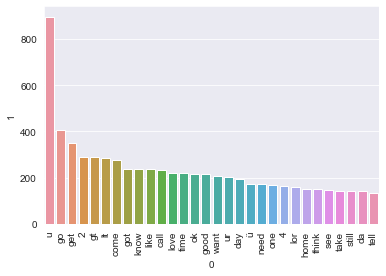

In [119]:
sns.barplot(pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0], pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [120]:
df.head()

,targets,message,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


## Building the Model

We'll be building the Naive Bayes Model, cuz Naive Bayes performs best on Textaual Data.
But we'll be looking other algos as well.
Like,
Random Forest Classification

Since the input is required to be numerical, so we have to convert this using TfidfVectorizer and Bag_Of_words.

In [121]:
# we'll vectorize the data using bag_of_words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [122]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [123]:
X.shape

(5157, 6781)

In [124]:
y = df['targets'].values

In [125]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [128]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [129]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [130]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8691860465116279
[[786 119]
 [ 16 111]]
0.4826086956521739


We can see that the precision score is too less and the model is not performing well.

In [131]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9796511627906976
[[895  10]
 [ 11 116]]
0.9206349206349206


Here we can see the the accuracy is 96% and precision is 84%.

In [132]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


Here we can see that the accuracy score is 97% and the precision score is 98%. Which is good as conpared to the previous models

We'll now use Tfidfvectorizer for encoding the words

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [134]:
tfidf = TfidfVectorizer(max_features=3000)

In [135]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [136]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
X.shape

(5157, 3000)

In [138]:
y = df['targets'].values

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [140]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [141]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [142]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


Here we can see that, the precision score has improved drastically i.e. 100% but the accuracy score has a bit reduced i.e. 95% ~ 96%

In [143]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


Since we will go with Multinomial Naive Baise, as the precision score is very high with mnb with TfidfVectorizer

### Comparing other ML models

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [145]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [146]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [147]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [148]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [149]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9718992248062015
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9786821705426356
Precision -  0.9906542056074766
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941
For  xgb
Accuracy -  0.9689922480620154
Precision -  0.9611650485436893


In [150]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [151]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.971899,1.000000
8,ETC,0.978682,0.990654
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
10,xgb,0.968992,0.961165
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892


In [152]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [153]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.971899
3,ETC,Accuracy,0.978682
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,xgb,Accuracy,0.968992
7,AdaBoost,Accuracy,0.966085
8,LR,Accuracy,0.958333
9,BgC,Accuracy,0.961240


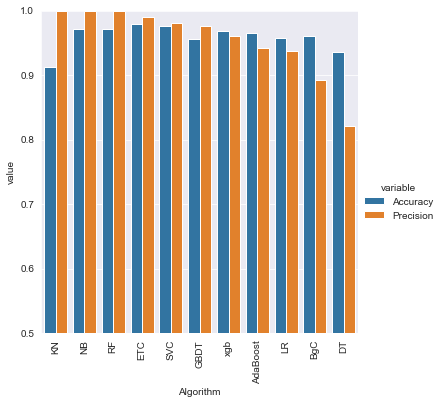

In [154]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

1. Change the max_features parameter to Tfidf

In [155]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [156]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [157]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [158]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [159]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [160]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
3,ETC,0.978682,0.990654,0.978682,0.990654,0.978682,0.990654,0.978682,0.990654
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,xgb,0.968992,0.961165,0.968992,0.961165,0.968992,0.961165,0.968992,0.961165
7,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
8,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
9,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892


In [161]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [162]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [163]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [164]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [165]:
# Applying stacking, we'll give weightage for these 3 algos and take the best one out.
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [166]:
from sklearn.ensemble import StackingClassifier

In [167]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [168]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 0.9736842105263158


Creating a pipeline so that we can run this model locally.

In [169]:
from sklearn.naive_bayes import MultinomialNB

In [170]:
mnb = MultinomialNB()

In [171]:
import pickle
pickle.dump(tfidf,open('vectorized.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [172]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [173]:
import pickle
pickle.dump(rfc, open('model_rfc.pkl', 'wb'))

In [176]:
TFIDF = TfidfVectorizer()

In [181]:
Z =  TFIDF.fit_transform(df['transformed_text']).toarray()

In [180]:
pickle.dump(TFIDF, open('new_vector.pkl', 'wb'))

In [182]:
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])